In [63]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC

In [46]:
#Particle Data from Rodrigues, E., & Schreiner, H. Particle [Computer software]. https://doi.org/10.5281/zenodo.2552429
particle = pd.read_csv("particle2023.csv")
particle = particle.drop(["I","Status"],axis=1)
particle.Quarks = particle.Quarks.astype("str")
particle
#lowercase quarks are the corresponding quarks, uppercase quarks are the corresponding anti-quarks.
particle.head(15)

,ID,Mass,MassUpper,MassLower,Width,WidthUpper,WidthLower,G,P,C,Anti,Charge,Rank,Name,Quarks
0,1,4.670000,5.000000e-01,2.000000e-01,-1.0,-1.0,-1.0,5,1,5,1,-1,0,d,d
1,-1,4.670000,5.000000e-01,2.000000e-01,-1.0,-1.0,-1.0,5,1,5,1,1,0,d,D
2,2,2.160000,5.000000e-01,3.000000e-01,-1.0,-1.0,-1.0,5,1,5,1,2,0,u,u
3,-2,2.160000,5.000000e-01,3.000000e-01,-1.0,-1.0,-1.0,5,1,5,1,-2,0,u,U
4,3,93.400000,8.600000e+00,3.400000e+00,-1.0,-1.0,-1.0,5,1,5,1,-1,0,s,s
5,-3,93.400000,8.600000e+00,3.400000e+00,-1.0,-1.0,-1.0,5,1,5,1,1,0,s,S
6,4,1270.000000,2.000000e+01,2.000000e+01,-1.0,-1.0,-1.0,5,1,5,1,2,0,c,c
7,-4,1270.000000,2.000000e+01,2.000000e+01,-1.0,-1.0,-1.0,5,1,5,1,-2,0,c,C
8,5,4180.000000,3.000000e+01,2.000000e+01,-1.0,-1.0,-1.0,5,1,5,1,-1,0,b,b
9,-5,4180.000000,3.000000e+01,2.000000e+01,-1.0,-1.0,-1.0,5,1,5,1,1,0,b,B


In [73]:
print("""Rank - the particle rank as specified by the PDG, i.e., the number of baryon stars: Possible values are:
\ 4 - Existence is certain, and properties are at least fairly well explored.
\ 3 - Existence ranges from very likely to certain, but further confirmation
is desirable and/or quantum numbers, branching fractions, etc. are not well determined.
\ 2 - Evidence of existence is only fair.
\ 1 - Evidence of existence is poor.
\ 0 - Fundamental Particles - Existence is certain.""")

Rank - the particle rank as specified by the PDG, i.e., the number of baryon stars: Possible values are:
\ 4 - Existence is certain, and properties are at least fairly well explored.
\ 3 - Existence ranges from very likely to certain, but further confirmation
is desirable and/or quantum numbers, branching fractions, etc. are not well determined.
\ 2 - Evidence of existence is only fair.
\ 1 - Evidence of existence is poor.
\ 0 - Fundamental Particles - Existence is certain.


In [47]:
particle["up_count"] = particle.Quarks.apply(lambda x: x.count("u"))
particle["anti_up_count"] = particle.Quarks.apply(lambda x: x.count("U"))
particle["down_count"] = particle.Quarks.apply(lambda x: x.count("d"))
particle["anti_down_count"] = particle.Quarks.apply(lambda x: x.count("D"))
particle["strange_count"] = particle.Quarks.apply(lambda x: x.count("s") if "sqrt" not in x else 0)
particle["anti_strange_count"] = particle.Quarks.apply(lambda x: x.count("S"))
particle["bottom_count"] = particle.Quarks.apply(lambda x: x.count("b"))
particle["anti_bottom_count"] = particle.Quarks.apply(lambda x: x.count("B"))
particle["top_count"] = particle.Quarks.apply(lambda x: x.count("t") if "sqrt" not in x else 0)
particle["anti_top_count"] = particle.Quarks.apply(lambda x: x.count("T"))
particle

,ID,Mass,MassUpper,MassLower,Width,WidthUpper,WidthLower,G,P,C,...,up_count,anti_up_count,down_count,anti_down_count,strange_count,anti_strange_count,bottom_count,anti_bottom_count,top_count,anti_top_count
0,1,4.67,0.5,0.2,-1.0,-1.0,-1.0,5,1,5,...,0,0,1,0,0,0,0,0,0,0
1,-1,4.67,0.5,0.2,-1.0,-1.0,-1.0,5,1,5,...,0,0,0,1,0,0,0,0,0,0
2,2,2.16,0.5,0.3,-1.0,-1.0,-1.0,5,1,5,...,1,0,0,0,0,0,0,0,0,0
3,-2,2.16,0.5,0.3,-1.0,-1.0,-1.0,5,1,5,...,0,1,0,0,0,0,0,0,0,0
4,3,93.40,8.6,3.4,-1.0,-1.0,-1.0,5,1,5,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
617,9050221,1982.00,50.0,3.0,440.0,50.0,50.0,1,1,1,...,1,1,1,1,1,1,0,0,0,0
618,9050225,1936.00,12.0,12.0,464.0,24.0,24.0,1,1,1,...,1,1,1,1,1,1,0,0,0,0
619,9060225,2010.00,60.0,80.0,200.0,60.0,60.0,1,1,1,...,1,1,1,1,1,1,0,0,0,0
620,9080225,2297.00,28.0,28.0,150.0,40.0,40.0,1,1,1,...,1,1,1,1,1,1,0,0,0,0


In [48]:
particle.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 622 entries, 0 to 621
Data columns (total 25 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  622 non-null    int64  
 1   Mass                622 non-null    float64
 2   MassUpper           622 non-null    float64
 3   MassLower           622 non-null    float64
 4   Width               622 non-null    float64
 5   WidthUpper          622 non-null    float64
 6   WidthLower          622 non-null    float64
 7   G                   622 non-null    int64  
 8   P                   622 non-null    int64  
 9   C                   622 non-null    int64  
 10  Anti                622 non-null    int64  
 11  Charge              622 non-null    int64  
 12  Rank                622 non-null    int64  
 13  Name                622 non-null    object 
 14  Quarks              622 non-null    object 
 15  up_count            622 non-null    int64  
 16  anti_up_

<AxesSubplot:>

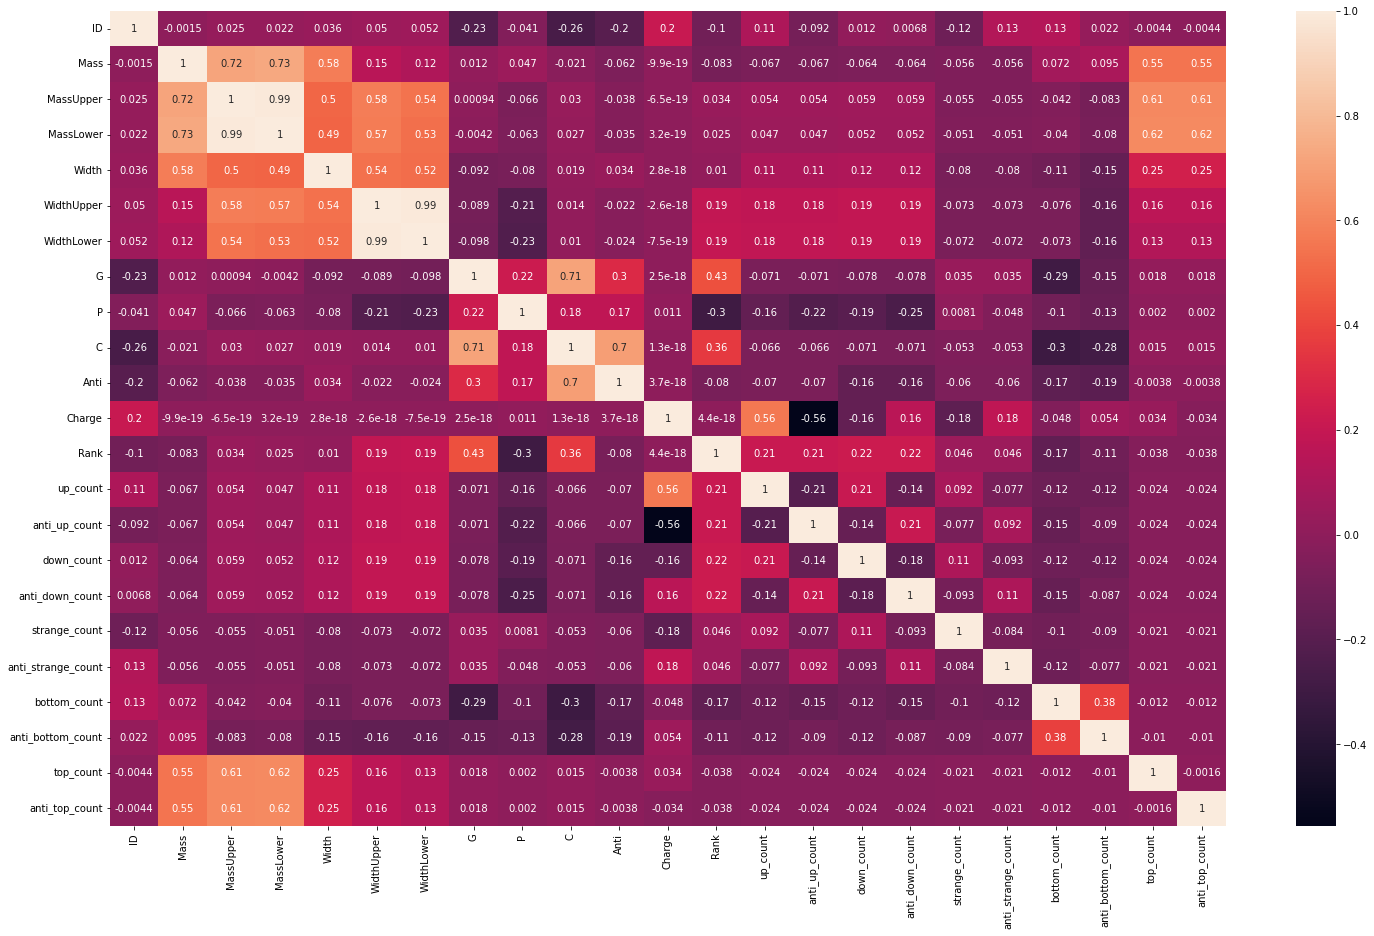

In [49]:
plt.figure(figsize = (25,15))
sns.heatmap(particle.corr(),annot = True)

In [50]:
sc = StandardScaler()
particle["Mass"] =sc.fit_transform(particle["Mass"].values.reshape(-1,1))
particle["MassUpper"] = sc.fit_transform(particle["MassUpper"].values.reshape(-1,1))
particle["MassLower"] = sc.fit_transform(particle["MassLower"].values.reshape(-1,1))
particle["Width"] = sc.fit_transform(particle["Width"].values.reshape(-1,1))
particle["WidthUpper"] = sc.fit_transform(particle["WidthUpper"].values.reshape(-1,1))
particle["WidthLower"] = sc.fit_transform(particle["WidthLower"].values.reshape(-1,1))
particle["G"] = sc.fit_transform(particle["G"].values.reshape(-1,1))
particle["P"] = sc.fit_transform(particle["P"].values.reshape(-1,1))
particle["C"] = sc.fit_transform(particle["C"].values.reshape(-1,1))
particle

,ID,Mass,MassUpper,MassLower,Width,WidthUpper,WidthLower,G,P,C,...,up_count,anti_up_count,down_count,anti_down_count,strange_count,anti_strange_count,bottom_count,anti_bottom_count,top_count,anti_top_count
0,1,-0.256196,-0.352451,-0.341989,-0.634707,-0.679166,-0.682419,0.460463,0.049896,0.378004,...,0,0,1,0,0,0,0,0,0,0
1,-1,-0.256196,-0.352451,-0.341989,-0.634707,-0.679166,-0.682419,0.460463,0.049896,0.378004,...,0,0,0,1,0,0,0,0,0,0
2,2,-0.256399,-0.352451,-0.339738,-0.634707,-0.679166,-0.682419,0.460463,0.049896,0.378004,...,1,0,0,0,0,0,0,0,0,0
3,-2,-0.256399,-0.352451,-0.339738,-0.634707,-0.679166,-0.682419,0.460463,0.049896,0.378004,...,0,1,0,0,0,0,0,0,0,0
4,3,-0.249014,-0.171713,-0.269962,-0.634707,-0.679166,-0.682419,0.460463,0.049896,0.378004,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
617,9050221,-0.096151,0.752060,-0.278965,1.496627,0.586523,0.626991,-1.535412,0.049896,-2.058455,...,1,1,1,1,1,1,0,0,0,0
618,9050225,-0.099875,-0.095848,-0.076389,1.612618,-0.058730,-0.040551,-1.535412,0.049896,-2.058455,...,1,1,1,1,1,1,0,0,0,0
619,9060225,-0.093885,0.975193,1.454189,0.336717,0.834698,0.883738,-1.535412,0.049896,-2.058455,...,1,1,1,1,1,1,0,0,0,0
620,9080225,-0.070655,0.261166,0.283747,0.095069,0.338349,0.370244,-1.535412,0.049896,-2.058455,...,1,1,1,1,1,1,0,0,0,0


In [59]:
X= particle[['Mass', 'MassUpper', 'MassLower', 'Width', 'WidthUpper',
       'WidthLower', 'G', 'P', 'C', 'Anti', 'Charge',
       'up_count', 'anti_up_count', 'down_count', 'anti_down_count',
       'strange_count', 'anti_strange_count', 'bottom_count',
       'anti_bottom_count', 'top_count', 'anti_top_count']]
y=particle["Rank"]


In [62]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.25)

In [70]:
clf = LinearSVC(max_iter=10000)

clf.fit(X_train,y_train)
clf.score(X_test,y_test)
clf.predict(X_test)

C:\Users\seb_d\anaconda3\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


array([0, 0, 3, 3, 0, 0, 3, 4, 4, 0, 0, 0, 0, 0, 0, 4, 0, 4, 0, 4, 4, 4,
       3, 0, 0, 0, 4, 4, 0, 0, 4, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 3, 0, 4,
       4, 4, 3, 0, 4, 0, 3, 3, 4, 0, 0, 4, 3, 4, 4, 3, 4, 0, 4, 0, 0, 0,
       4, 3, 0, 3, 4, 0, 0, 0, 3, 0, 3, 4, 0, 0, 3, 3, 4, 0, 4, 4, 0, 0,
       4, 3, 4, 0, 3, 3, 4, 0, 0, 4, 4, 0, 0, 0, 3, 3, 4, 4, 0, 4, 0, 0,
       0, 0, 4, 0, 4, 4, 0, 3, 4, 0, 0, 4, 0, 0, 3, 4, 0, 0, 0, 0, 0, 3,
       3, 4, 0, 0, 4, 0, 4, 0, 3, 4, 4, 0, 0, 0, 0, 4, 0, 4, 3, 3, 3, 0,
       0, 0], dtype=int64)